In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Simulated data

In [16]:
w1 = np.arange(0, 10000, 1)
w2 = np.arange(0, 10000, 1)
w3 = np.zeros(10000)
temp = np.full(10000, 10000)
w3 = np.append(w3, w1)
w1 = np.append(w1, temp)
w2 = np.append(w2, temp)


Plotting simulated data for respective wheels

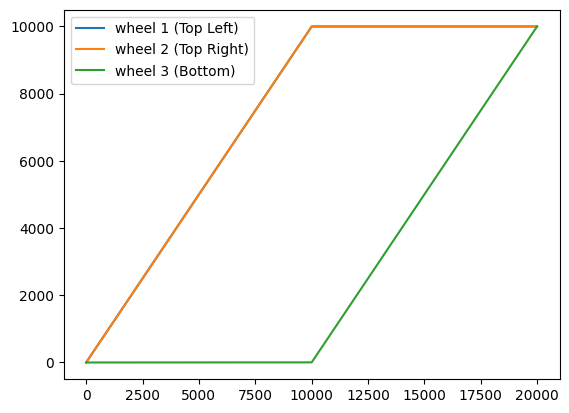

In [20]:
plt.plot(w1, label='wheel 1 (Top Left)')
plt.plot(w2, label='wheel 2 (Top Right)')
plt.plot(w3, label='wheel 3 (Bottom)')
plt.legend()